## Iris Dataset Classification using K-Nearest Neighbors (Euclidean)

### Summary
<img align="right" src="../image/NearestNeighbor.png" width=150 height=150>
KNN은 새로운 데이터가 주어졌을 때 기존 데이터 가운데 가장 가까운 k개 이웃의 정보로 새로운 데이터를 예측하는 알고리즘

새로운 데이터가 주어진 경우 기존 모든 데이터와의 거리를 계산한다. 계산된 거리 값이 작은 k개의 데이터를 선정한다. 새로운 데이터의 클래스는 선정된 데이터들의 클래스 중 가장 많이 선택된 클래스로 분류한다.

거리 계산 방법에는 Euclidean, Mahalanobis 등 있다.

Iris 데이터셋을 이용하여 Setosa, Versicolour, irginica 3가지 클래스로 구분한다. 거리 계산 방법은 Euclidean을 사용한다.

<span style="color: #2D3748; background-color:#fff5b1;">Test size를 0.2인 10번 반복 실험한 결과 평균적으로 0.95의 정확도를 보여주고 있고, test 데이터를 분류하는데 0.005초의 시간이 걸린다.</span>

## Load Iris Dataset

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
iris = load_iris()

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
features = iris.data
feature_names = iris.feature_names
target = iris.target
target_names = iris.target_names

print("Data shape : ", features.shape)

df_feature = pd.DataFrame(features, columns=feature_names)
df_target = pd.DataFrame(target, columns=["target"])

df = pd.concat([df_feature, df_target], axis=1)

Data shape :  (150, 4)


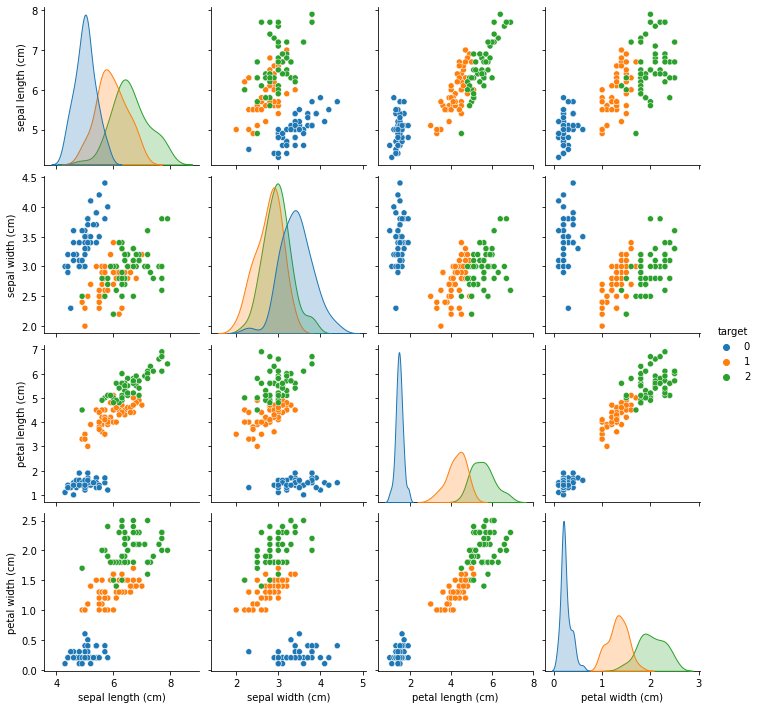

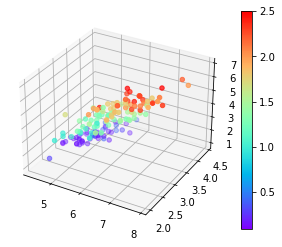

In [4]:
sns.pairplot(df, hue="target", palette="tab10")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = features[:, 0]
y = features[:, 1]
z = features[:, 2]
c = features[:, 3]

img = ax.scatter(x, y, z, c=c, cmap=plt.cm.rainbow)
fig.colorbar(img)
plt.show()

## K-Nearest Neighbor

In [5]:
avg_test_acc = []
avg_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    k = 1

    knn = KNeighborsClassifier(k, weights='distance', metric='mahalanobis', metric_params={'V': np.cov(x_train.T)}, n_jobs=-1)
    knn.fit(x_train, y_train)

    start = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print("-----" * 8)
print("Test set score: %f" % np.array(avg_test_acc).mean())
print("Training Time : %.4f" % np.array(avg_time).mean(), "sec")

train size :  120  / test size :  30
----------------------------------------
Test set score: 0.893333
Training Time : 0.1236 sec
